In [1]:
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('C:\\Users\\bhush\\Downloads\\EDA\\Projects\\Superstore Dataset\\train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Descriptive Satistics

In [10]:
print('No. of rows:', df.shape[0])
print('No. of columns:', df.shape[1])

No. of rows: 9800
No. of columns: 18


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [14]:
df.describe(include=object).T

,count,unique,top,freq
Order ID,9800,4922,CA-2018-100111,14
Order Date,9800,1230,05/09/2017,38
Ship Date,9800,1326,26/09/2018,34
Ship Mode,9800,4,Standard Class,5859
Customer ID,9800,793,WB-21850,35
Customer Name,9800,793,William Brown,35
Segment,9800,3,Consumer,5101
Country,9800,1,United States,9800
City,9800,529,New York City,891
State,9800,49,California,1946


In [19]:
numerical_df = df.select_dtypes(include=['number'])

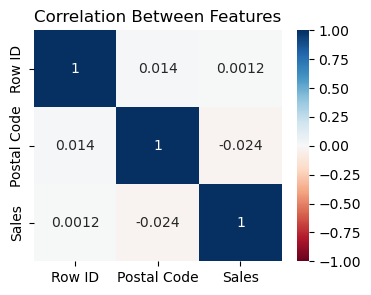

In [26]:
# Correlation
plt.figure(figsize=(4,3))
sns.heatmap(numerical_df.corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.title('Correlation Between Features')
plt.show()

## Univariate Analysis

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [48]:
cat_cols = ['Region','Category']
#colours
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
          'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender']

In [32]:
a = df['Sales'].skew()

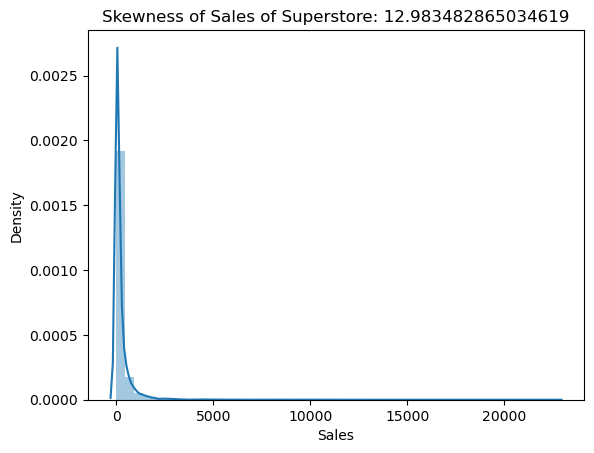

In [34]:
sns.distplot(df['Sales'])
plt.title(f'Skewness of Sales of Superstore: {a}')
plt.show()

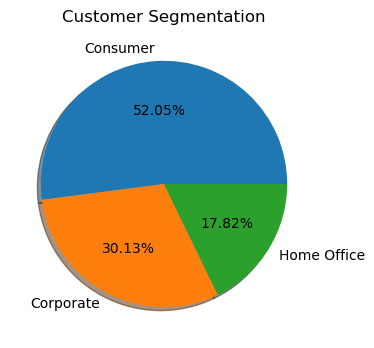

In [68]:
# Customer Segmentation
plt.figure(figsize=(5,4))
df['Segment'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title('Customer Segmentation')
plt.ylabel('')
plt.show()

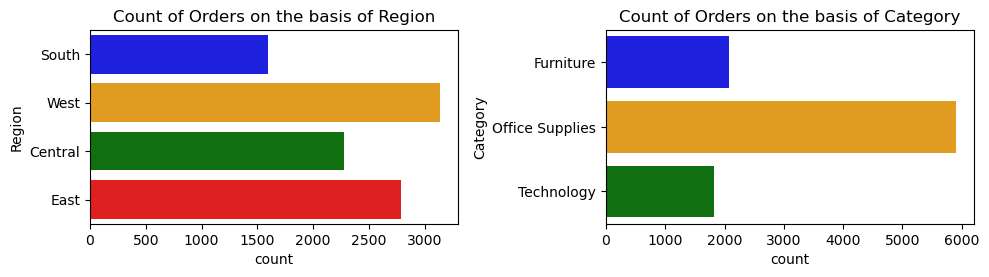

In [65]:
t=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(df[i],palette=c)
    plt.title(f'Count of Orders on the basis of {i}')
    t = t+1
plt.tight_layout()
plt.show()

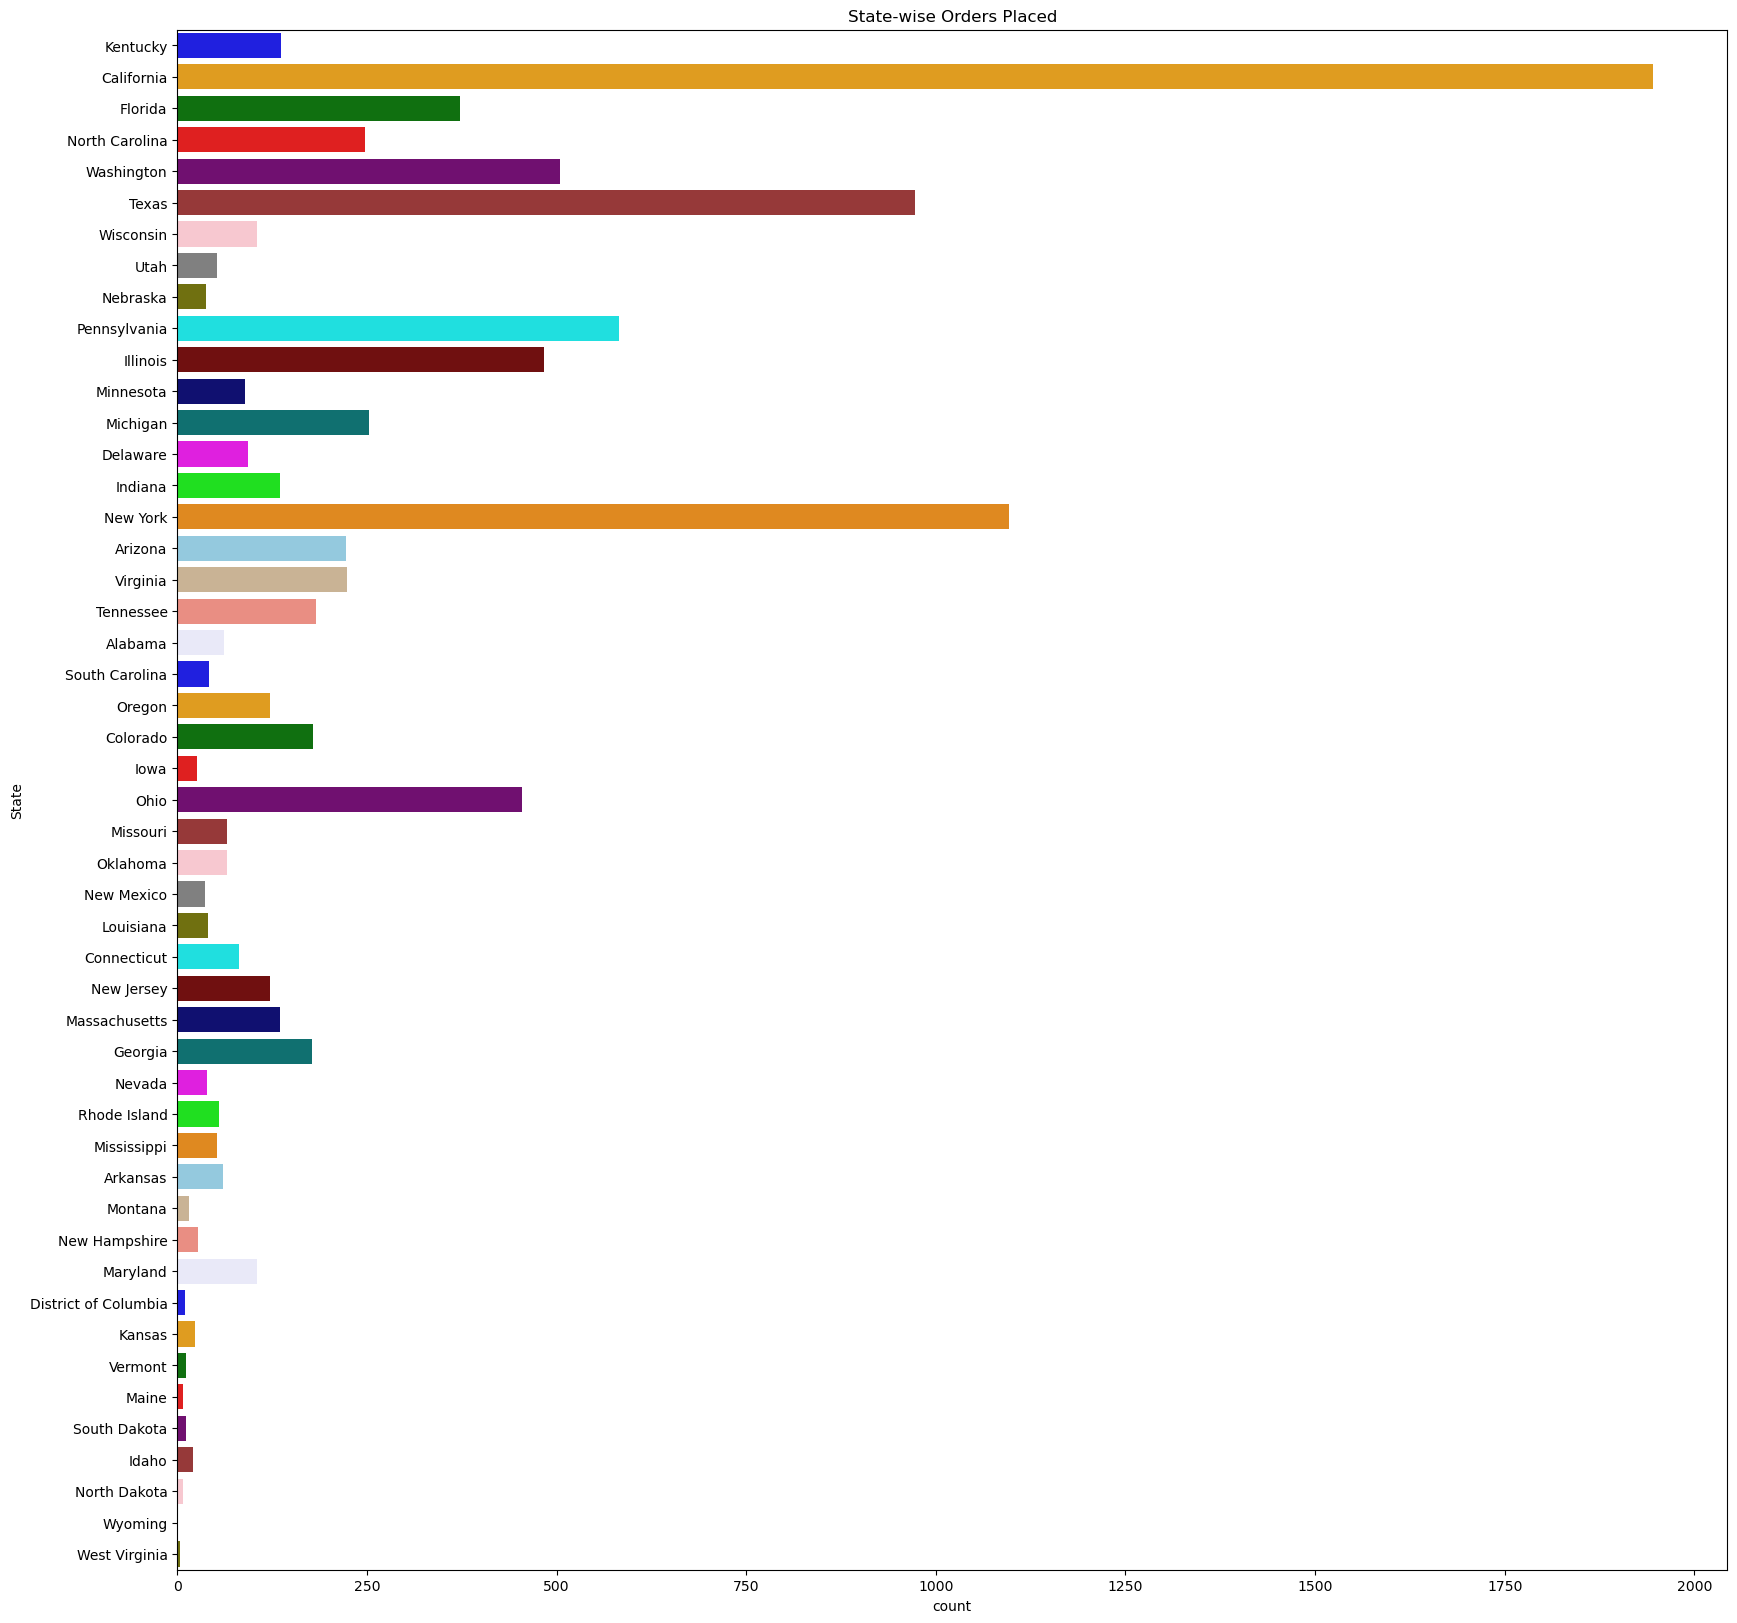

In [64]:
plt.figure(figsize=(20,20))
sns.countplot(y = df['State'],palette=c)
plt.title('State-wise Orders Placed')
plt.show()

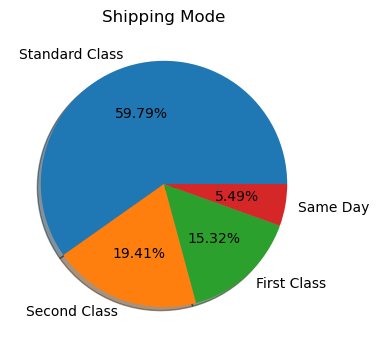

In [67]:
plt.figure(figsize=(5,4))
df['Ship Mode'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title('Shipping Mode')
plt.ylabel('')
plt.show()

## Bivarite Analysis

In [70]:
cols = ['Segment','Category','Sub-Category','Country','Region']

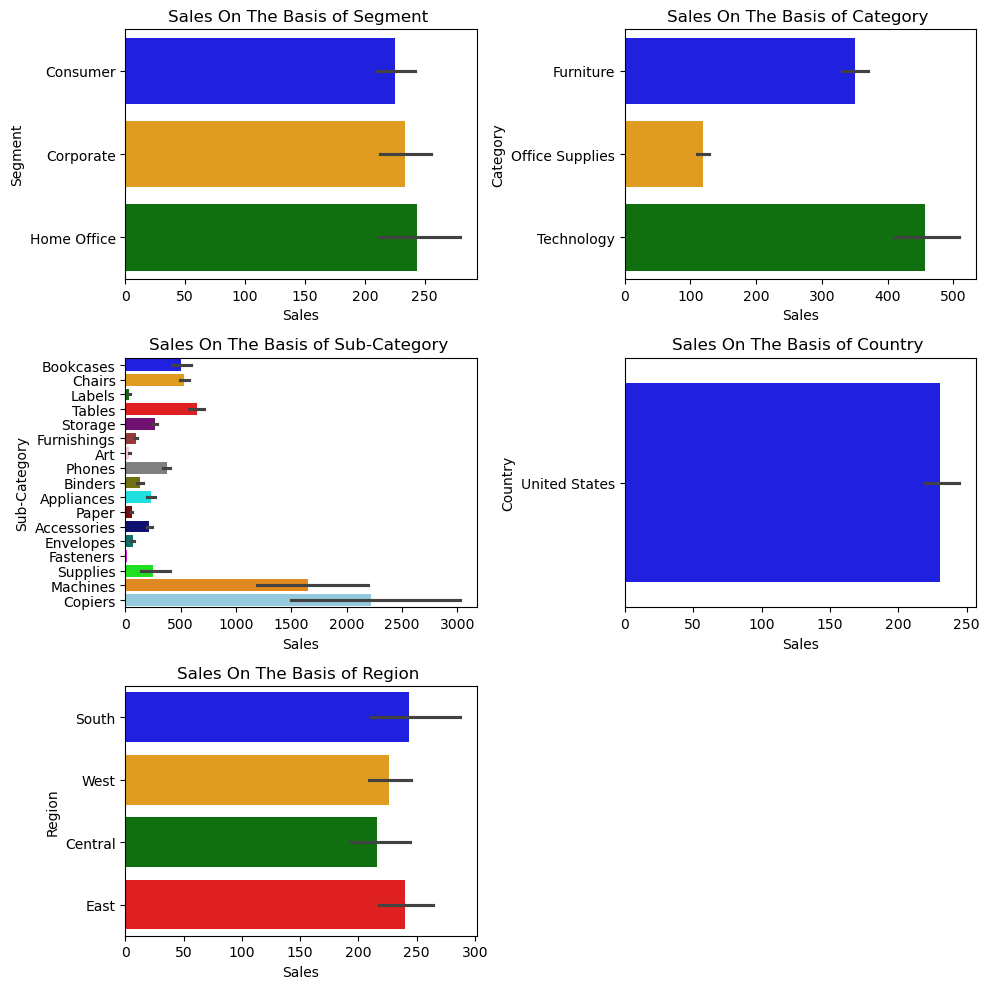

In [77]:
t=1
plt.figure(figsize=(10,10))
for i in cols:
    plt.subplot(3,2,t)
    sns.barplot(x=df['Sales'],y=df[i],palette=c)
    plt.title(f'Sales On The Basis of {i} ')
    t= t+1
plt.tight_layout()
plt.show()

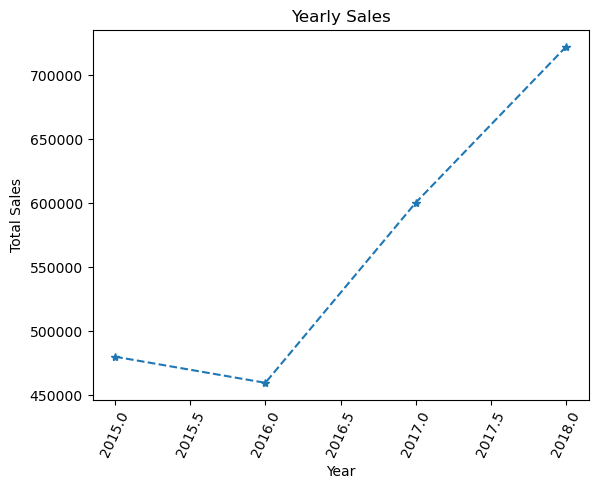

In [83]:


df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

yearly_sales  = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})


plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker = '*',linestyle = '--')

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()

Yearly sales of the store are increasing